# Оптимизация функций

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Минимизация гладкой функции

In [24]:
from scipy import optimize

Определим функцию и построим её график

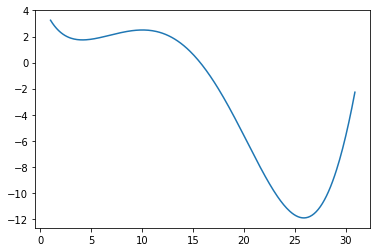

In [19]:
def f(x):
    return np.sin(x / 5.0) * np.exp(x / 10.) + 5 * np.exp(-x / 2.)

x = np.arange(1, 31, 0.1)
plt.plot(x, f(x))
plt.show()

Минимизируем функцию с начальным приближением в точке 2 - попадем в локальный минимум

In [32]:
min_f = optimize.minimize(f, x0=[2], method="BFGS")
print(min_f)
print(round(min_f.fun, 2))

      fun: 1.7452682903449388
 hess_inv: array([[5.98752437]])
      jac: array([-2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627618])
1.75


Глобальный минимум при начальном приближении в 30

In [33]:
min_f = optimize.minimize(f, x0=[30], method="BFGS")
print(min_f)
print(round(min_f.fun, 2))

      fun: -11.898894665981285
 hess_inv: array([[1.67932484]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019339])
-11.9


##  Глобальная оптимизация

In [35]:
bounds = (1, 30)
min_f = optimize.differential_evolution(f, [bounds])
print(min_f)
print(round(min_f.fun[0], 2))

     fun: array([-11.89889467])
     jac: array([-3.55271368e-07])
 message: 'Optimization terminated successfully.'
    nfev: 85
     nit: 4
 success: True
       x: array([25.88019275])
-11.9


## Минимизация негладкой функции

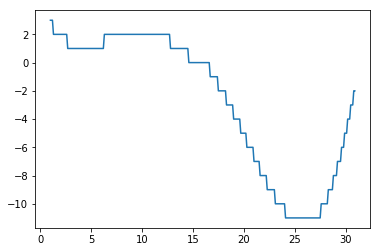

In [46]:
def h(x):
    return np.int_(f(x))

plt.plot(x, h(x))
plt.show()

### Сравнение методов

In [54]:
min_h = optimize.minimize(h, x0=[30], method="BFGS")
print(min_h)
print(round(min_h.fun[0], 2))

      fun: array([-5])
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])
-5


In [58]:
bounds = (1, 30)
min_h = optimize.differential_evolution(h, [bounds])
print(min_h)
print(round(min_h.fun, 2))

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([25.76897217])
-11.0
